In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
import datetime as dt

pd.options.display.max_rows = 999
pd.options.display.max_columns = 100

%matplotlib inline

from new_thesis_library import *

In this document we gather data for Russian governament bonds starting from year 2014.

# Determining valid bonds from Cbonds search

In [ ]:
bond_search = pd.read_excel('/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/Data/New_data/New_search.xls')
registration_numbers = bond_search['Регистрационный номер']

In [81]:
valid_codes = []

for number in registration_numbers:

    codes = ['SU' + number + str(i) for i in range(0, 10)]
    
    for code in codes:
        try:
            prices_df = MoexReader(code, start = '01.01.2014').read()
            if prices_df.empty == False:
                valid_codes.append(code)
        except OSError:
            continue    

In [84]:
for i in range(len(valid_codes)):
    print(str(i+1) + '. ' + valid_codes[i])

1. SU25076RMFS9
2. SU25068RMFS6
3. SU25071RMFS0
4. SU26202RMFS0
5. SU25079RMFS3
6. SU25075RMFS1
7. SU25077RMFS7
8. SU25082RMFS7
9. SU46017RMFS8
10. SU26203RMFS8
11. SU25080RMFS1
12. SU26206RMFS1
13. SU25081RMFS9
14. SU26204RMFS6
15. SU46021RMFS0
16. SU46014RMFS5
17. SU46005RMFS3
18. SU26208RMFS7
19. SU46019RMFS4
20. SU26216RMFS0
21. SU26210RMFS3
22. SU53001RMFS2
23. SU26214RMFS5
24. SU53002RMFS0
25. SU53003RMFS8
26. SU26205RMFS3
27. SU26217RMFS8
28. SU46018RMFS6
29. SU25083RMFS5
30. SU26209RMFS5
31. SU53004RMFS6
32. SU26220RMFS2
33. SU53005RMFS3
34. SU26211RMFS1
35. SU46022RMFS8
36. SU26215RMFS2
37. SU52001RMFS3
38. SU25084RMFS3
39. SU26223RMFS6
40. SU26227RMFS7
41. SU26222RMFS8
42. SU26234RMFS3
43. SU46011RMFS1
44. SU26229RMFS3
45. SU46023RMFS6
46. SU26219RMFS4
47. SU26226RMFS9
48. SU26207RMFS9
49. SU26232RMFS7
50. SU26212RMFS9
51. SU52002RMFS1
52. SU26224RMFS4
53. SU26228RMFS5
54. SU26218RMFS6
55. SU26221RMFS0
56. SU26225RMFS1
57. SU46020RMFS2
58. SU26230RMFS1


In [294]:
original_moex_data[16]

,BOARDID,SHORTNAME,SECID,NUMTRADES,VALUE,OPEN,LOW,HIGH,CLOSE,WAPRICE,TRADINGSESSION
TRADEDATE,,,,,,,,,,,
2015-06-10,RPMO,ОФЗ 46005,SU46005RMFS3,1,70055800,70.0558,70.0558,70.0558,70.0558,70.0558,3
2016-03-24,RPMO,ОФЗ 46005,SU46005RMFS3,2,799645000,79.9645,79.9645,79.9645,79.9645,NaN,3
2016-03-25,RPMO,ОФЗ 46005,SU46005RMFS3,2,799642000,79.9642,79.9642,79.9642,79.9642,NaN,3
2016-03-28,RPMO,ОФЗ 46005,SU46005RMFS3,1,399821000,79.9642,79.9642,79.9642,79.9642,NaN,3
2017-06-20,RPMO,ОФЗ 46005,SU46005RMFS3,1,85218700,85.2187,85.2187,85.2187,85.2187,NaN,3


# Looking at the prices from MOEX

In [26]:
moex_prices = pd.read_csv('/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/Data/New_data/moex_prices.csv',
                          sep = ";")

In [27]:
moex_prices['tradedate'] = pd.to_datetime(moex_prices['tradedate'], format='%d.%m.%Y')

In [31]:
moex_prices['crtprice'] = moex_prices['crtprice'].apply(lambda x: x.replace(',','.'))

In [34]:
moex_prices['crtprice'] = moex_prices['crtprice'].astype('float64')

In [39]:
len(moex_prices.secid.unique())

39

# Reading bonds' quotes from imported data from Cbonds

In [2]:
import xlrd

In [3]:
bonds_quotes_book = xlrd.open_workbook('/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/Data/New_data/Bonds_quotes.xlsx')

In [4]:
ISIN = bonds_quotes_book.sheet_names()

In [5]:
raw_bonds_quotes_dict = pd.read_excel(io = '/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/Data/New_data/Bonds_quotes.xlsx', 
                                      sheet_name = ISIN)

In [8]:
bonds_quotes_dict = {}

for code in ISIN:
    df = raw_bonds_quotes_dict[code][6:]
    df.columns = raw_bonds_quotes_dict[code].iloc[5].values
    df['Дата торгов'] = pd.to_datetime(df['Дата торгов'], format='%Y%m%d')
    df.set_index('Дата торгов', inplace = True)
    bonds_quotes_dict[code] = df

/Users/andrey_lukyanov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
list_of_avg_quotes = []

for i in range(len(ISIN)):
    list_of_avg_quotes.append(bonds_quotes_dict[ISIN[i]]['Цена средневзвешенная, %'])

In [21]:
bonds_clean_prices = pd.concat(list_of_avg_quotes, axis = 1)
bonds_clean_prices.columns = ISIN
bonds_clean_prices.index.names = ['TRADEDATE']
bonds_clean_prices.to_csv('/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/Data/New_data/bonds_clean_prices.csv')

In [51]:
bonds_clean_prices = pd.read_csv('/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/Data/New_data/bonds_clean_prices.csv', 
                                 index_col = 0, parse_dates = True)

In [52]:
bonds_clean_prices.isna().sum().sum()

46299

### Bonds with sparse data

In [151]:
ISIN[7], ISIN[14], ISIN[15], ISIN[25], ISIN[28], ISIN[29], ISIN[38], ISIN[51], ISIN[52]

('RU000A0JTWW3',
 'RU000A0JP2S9',
 'RU000A0JNHJ4',
 'RU000A0JRTL6',
 'RU0002868001',
 'RU000A0JS4M5',
 'RU0002867854',
 'RU0002868076',
 'RU0002867631')

# Reading bonds payments

In [283]:
bonds_payments = pd.read_csv('/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/Data/New_data/bonds_payments.csv',
                             sep = ';')
bonds_payments['Дата фактической выплаты'] = pd.to_datetime(bonds_payments['Дата фактической выплаты'], format='%d.%m.%Y')

In [309]:
bonds_payments[['Ставка купона, % годовых',
                'Сумма купона, RUB',
                'Погашение номинала, RUB']] = bonds_payments[['Ставка купона, % годовых', 
                                                              'Сумма купона, RUB', 
                                                              'Погашение номинала, RUB']].apply(lambda x: x.str.replace(',','.'))
bonds_payments[['Ставка купона, % годовых',
                'Сумма купона, RUB',
                'Погашение номинала, RUB']] = bonds_payments[['Ставка купона, % годовых', 
                                                              'Сумма купона, RUB', 
                                                              'Погашение номинала, RUB']].apply(lambda x: x.str.replace(' ',''))

In [310]:
bonds_payments.fillna(0, inplace = True)

In [311]:
bonds_payments[['Ставка купона, % годовых',
                'Сумма купона, RUB',
                'Погашение номинала, RUB']] = bonds_payments[['Ставка купона, % годовых', 
                                                              'Сумма купона, RUB', 
                                                              'Погашение номинала, RUB']].astype('float64')

In [464]:
bonds_payments[['Сумма купона, RUB', 
                'Погашение номинала, RUB']] = bonds_payments[['Сумма купона, RUB', 
                                                              'Погашение номинала, RUB']]/10

In [466]:
bonds_payments.to_csv('/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/Data/New_data/bonds_payments.csv')

In [7]:
bonds_payments = pd.read_csv('/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/Data/New_data/bonds_payments.csv',
                            index_col = 0)
bonds_payments['Дата фактической выплаты'] = pd.to_datetime(bonds_payments['Дата фактической выплаты'], format='%Y-%m-%d')

In [11]:
bonds_payments.head()

,Номер бумаги,ISIN,Номер платежа,Дата фактической выплаты,"Ставка купона, % годовых","Сумма купона, RUB","Погашение номинала, RUB"
0,1,RU000A0JR779,1,2011-09-15,7.1,4.649,0.0
1,1,RU000A0JR779,2,2012-03-15,7.1,3.540,0.0
2,1,RU000A0JR779,3,2012-09-13,7.1,3.540,0.0
3,1,RU000A0JR779,4,2013-03-14,7.1,3.540,0.0
4,1,RU000A0JR779,5,2013-09-12,7.1,3.540,0.0


# Exporting accrued interest

In [152]:
list_of_accint = []

for i in range(len(ISIN)):
    list_of_accint.append(bonds_quotes_dict[ISIN[i]]['НКД'])

In [153]:
bonds_accint = pd.concat(list_of_accint, axis = 1)
bonds_accint.columns = ISIN

In [154]:
bonds_accint.index.names = ['TRADEDATE']

In [385]:
bonds_payments[:20]

,Номер бумаги,ISIN,Номер платежа,Дата фактической выплаты,"Ставка купона, % годовых","Сумма купона, RUB","Погашение номинала, RUB"
0,1,RU000A0JR779,1,2011-09-15,7.1,46.49,0.0
1,1,RU000A0JR779,2,2012-03-15,7.1,35.40,0.0
2,1,RU000A0JR779,3,2012-09-13,7.1,35.40,0.0
3,1,RU000A0JR779,4,2013-03-14,7.1,35.40,0.0
4,1,RU000A0JR779,5,2013-09-12,7.1,35.40,0.0
5,1,RU000A0JR779,6,2014-03-13,7.1,35.40,1000.0
6,2,RU000A0JQAE3,1,2010-02-24,12.0,59.84,0.0
7,2,RU000A0JQAE3,2,2010-08-25,12.0,59.84,0.0
8,2,RU000A0JQAE3,3,2011-02-23,12.0,59.84,0.0
9,2,RU000A0JQAE3,4,2011-08-24,12.0,59.84,0.0


In [390]:
bonds_accint[:10]

,RU000A0JR779,RU000A0JQAE3,RU000A0JQLL5,RU000A0JQCL4,RU000A0JRHZ1,RU000A0JQYN4,RU000A0JR7G1,RU000A0JTWW3,RU000A0DY8K8,RU000A0JQZ18,RU000A0JS751,RU000A0JRJU8,RU000A0JTKZ1,RU000A0JRCJ6,RU000A0JP2S9,RU000A0JNHJ4,RU000A0JU9V1,RU000A0JTG59,RU000A0JTYA5,RU000A0JREQ7,RU000A0D0G29,RU000A0JSMA2,RU000A0JTJL3,RU000A0JPLH5,RU000A0JU4L3,RU000A0JRTL6,RU000A0JS3W6,RU000A0JTK38,RU0002868001,RU000A0JS4M5,RU000A0JVW30,RU000A0ZYCK6,RU000A0JXB41,RU000A101FA1,RU000A0ZYU88,RU000A1007F4,RU000A0JXQF2,RU000A101QE0,RU0002867854,RU000A100EG3,RU000A0JWM07,RU000A0ZZYW2,RU000A1014N4,RU000A0ZYUA9,RU000A100A82,RU000A0JVW48,RU000A0JXFM1,RU000A0ZYUB7,RU000A101F94,RU000A0GN9A7,RU000A100EF5,RU0002868076,RU0002867631
TRADEDATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-06,22.56,45.37,8.88,5.83,6.33,32.61,33.43,8.88,10.86,28.73,15.21,3.85,25.82,22.4,21.85,14.09,9.91,3.54,5.79,15.62,6.33,33.11,29.15,27.29,23.78,33.76,30.81,29.36,4.79,25.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.41,NaN,11.89,NaN
2014-01-08,22.95,46.03,9.32,6.44,6.71,32.99,33.83,9.21,11.22,29.11,15.61,4.26,26.16,22.81,22.15,14.19,10.28,3.91,6.14,16.03,6.71,33.52,29.53,27.62,24.16,34.2,31.26,29.75,4.88,25.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.79,NaN,12.08,NaN
2014-01-09,23.15,46.36,9.54,6.75,6.9,33.17,34.03,9.37,11.4,29.3,15.81,4.46,26.33,23.01,22.3,14.24,10.46,4.1,6.31,16.24,6.9,33.73,29.73,27.78,24.36,34.43,31.48,29.94,4.93,26.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.98,NaN,12.18,NaN
2014-01-10,23.34,46.68,9.76,7.06,7.1,33.36,34.23,9.53,11.58,29.49,16.02,4.66,26.5,23.22,22.45,14.29,10.65,4.28,6.49,16.45,7.1,33.94,29.92,27.95,24.55,34.65,31.71,30.13,4.97,26.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.17,NaN,12.27,NaN
2014-01-13,23.93,47.67,10.43,7.98,7.67,33.93,34.84,10.03,12.11,30.06,16.62,5.27,27.01,23.84,22.9,14.44,11.2,4.84,7.01,17.07,7.67,34.56,30.49,28.44,25.12,35.32,32.38,30.71,5.11,26.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.73,NaN,12.56,NaN
2014-01-14,24.12,48,10.65,8.28,7.86,34.12,35.04,10.19,12.29,30.25,16.83,5.47,27.18,24.04,23.05,14.49,11.38,5.03,7.19,17.28,7.86,34.77,30.68,28.6,25.32,35.55,32.6,30.9,5.16,27.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.92,NaN,12.66,NaN
2014-01-15,24.32,48.33,10.87,8.59,8.05,NaN,35.24,10.36,12.47,30.44,17.03,5.68,27.35,24.25,23.21,14.53,11.56,5.22,7.36,17.49,8.05,34.98,30.88,28.77,25.51,35.77,32.82,31.1,5.21,27.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.11,NaN,12.75,NaN
2014-01-16,24.51,48.66,11.1,8.9,8.25,0.19,35.44,10.52,12.64,30.62,17.23,5.88,27.52,24.45,23.36,14.58,11.75,5.4,7.54,17.7,8.25,35.19,31.07,28.93,25.7,35.99,33.05,31.29,5.25,27.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.3,NaN,12.85,NaN
2014-01-17,24.7,48.99,11.32,9.21,8.44,0.38,35.64,10.68,12.82,30.81,17.44,6.08,27.69,24.66,23.51,14.63,11.93,5.59,7.72,17.91,8.44,35.4,31.26,29.1,25.89,36.22,33.27,31.48,5.3,27.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.49,NaN,12.95,NaN


### Correcting bugs in data

In [403]:
for i in range(bonds_payments_after_2014.shape[0]):
    i_ISIN = bonds_payments_after_2014.ISIN.iloc[i]
    i_coupon = bonds_payments_after_2014['Сумма купона, RUB'].iloc[i]
    i_date = bonds_payments_after_2014['Дата фактической выплаты'].iloc[i]
#    print(i_ISIN, i_coupon, i_date)
    bonds_accint.at[i_date, i_ISIN] = i_coupon

In [407]:
bonds_accint.at[dt.datetime(year = 2016, month = 12, day = 29), 'RU000A0JVW30'] = 26.1

In [425]:
bonds_accint[ISIN[52]] = 0

In [468]:
bonds_accint = bonds_accint/10

In [25]:
bonds_accint = bonds_accint[:1638]

In [37]:
bonds_accint.to_csv('/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/Data/New_data/bonds_accint.csv')

In [38]:
bonds_accint = pd.read_csv('/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/Data/New_data/bonds_accint.csv',
                           index_col='TRADEDATE', parse_dates=True)

In [39]:
bonds_accint

,RU000A0JR779,RU000A0JQAE3,RU000A0JQLL5,RU000A0JQCL4,RU000A0JRHZ1,RU000A0JQYN4,RU000A0JR7G1,RU000A0JTWW3,RU000A0DY8K8,RU000A0JQZ18,RU000A0JS751,RU000A0JRJU8,RU000A0JTKZ1,RU000A0JRCJ6,RU000A0JP2S9,RU000A0JNHJ4,RU000A0JU9V1,RU000A0JTG59,RU000A0JTYA5,RU000A0JREQ7,RU000A0D0G29,RU000A0JSMA2,RU000A0JTJL3,RU000A0JPLH5,RU000A0JU4L3,RU000A0JRTL6,RU000A0JS3W6,RU000A0JTK38,RU0002868001,RU000A0JS4M5,RU000A0JVW30,RU000A0ZYCK6,RU000A0JXB41,RU000A101FA1,RU000A0ZYU88,RU000A1007F4,RU000A0JXQF2,RU000A101QE0,RU0002867854,RU000A100EG3,RU000A0JWM07,RU000A0ZZYW2,RU000A1014N4,RU000A0ZYUA9,RU000A100A82,RU000A0JVW48,RU000A0JXFM1,RU000A0ZYUB7,RU000A101F94,RU000A0GN9A7,RU000A100EF5,RU0002868076,RU0002867631
TRADEDATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-06,2.256,4.537,0.888,0.583,0.633,3.261,3.343,0.888,1.086,2.873,1.521,0.385,2.582,2.240,2.185,1.409,0.991,0.354,0.579,1.562,0.633,3.311,2.915,2.729,2.378,3.376,3.081,2.936,0.479,2.548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.741,NaN,1.189,0.0
2014-01-08,2.295,4.603,0.932,0.644,0.671,3.299,3.383,0.921,1.122,2.911,1.561,0.426,2.616,2.281,2.215,1.419,1.028,0.391,0.614,1.603,0.671,3.352,2.953,2.762,2.416,3.420,3.126,2.975,0.488,2.589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.779,NaN,1.208,0.0
2014-01-09,2.315,4.636,0.954,0.675,0.690,3.317,3.403,0.937,1.140,2.930,1.581,0.446,2.633,2.301,2.230,1.424,1.046,0.410,0.631,1.624,0.690,3.373,2.973,2.778,2.436,3.443,3.148,2.994,0.493,2.610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.798,NaN,1.218,0.0
2014-01-10,2.334,4.668,0.976,0.706,0.710,3.336,3.423,0.953,1.158,2.949,1.602,0.466,2.650,2.322,2.245,1.429,1.065,0.428,0.649,1.645,0.710,3.394,2.992,2.795,2.455,3.465,3.171,3.013,0.497,2.630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.817,NaN,1.227,0.0
2014-01-13,2.393,4.767,1.043,0.798,0.767,3.393,3.484,1.003,1.211,3.006,1.662,0.527,2.701,2.384,2.290,1.444,1.120,0.484,0.701,1.707,0.767,3.456,3.049,2.844,2.512,3.532,3.238,3.071,0.511,2.692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.873,NaN,1.256,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.728,0.511,3.478,3.068,2.516,2.665,2.133,3.260,3.090,4.781,NaN,2.856,0.384,0.547,2.018,2.226,3.386,1.478,0.419,8.603,0.940,2.208,1.808,1.364,0.643,1.593,2.259,1.898,0.814,2.323,2.760,1.899,NaN,0.0
2020-07-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.749,0.523,3.498,3.087,2.531,2.685,2.146,3.282,3.109,4.797,NaN,2.877,0.403,0.568,2.033,2.244,3.406,1.498,0.432,8.630,0.960,2.229,1.830,1.381,0.662,1.614,2.282,1.920,0.834,2.340,2.779,1.920,NaN,0.0
2020-07-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.770,0.536,3.519,3.106,2.546,2.704,2.159,3.305,3.129,4.813,NaN,2.897,0.422,0.588,2.047,2.262,3.426,1.517,0.444,8.658,0.979,2.250,1.851,1.397,0.681,1.635,2.305,1.941,0.854,2.357,2.798,1.941,NaN,0.0


# Calculating prices with the inclusion of amortisation and accrued interest

### Principal calculation

In [317]:
dates = bonds_clean_prices.index

principal = pd.DataFrame(np.zeros(bonds_clean_prices.shape), index = dates, columns = ISIN)

for i in range(len(dates)):
    payments_on_date = bonds_payments[bonds_payments['Дата фактической выплаты'] >= dates[i]]
    
    for code in ISIN:
        bond_principal = payments_on_date[payments_on_date['ISIN'] == code]['Погашение номинала, RUB'].values.sum()
        
        principal[i:i+1][code] = bond_principal/10

/Users/andrey_lukyanov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [319]:
principal.to_csv('/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/Data/New_data/principal.csv')

In [42]:
principal = pd.read_csv('/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/Data/New_data/principal.csv',
                        index_col='TRADEDATE', parse_dates=True)

In [318]:
%%bash
say finished

### Prices calculation

In [427]:
bonds_prices = np.empty(bonds_clean_prices.shape)
bonds_prices.fill(np.nan)

for i in range(len(dates)):    
    for j in range(bonds_clean_prices.shape[1]):        
        bonds_prices[i, j] = bonds_clean_prices.iloc[i, j] * principal.iloc[i, j] / 100 + bonds_accint.iloc[i, j] / 10
        
bonds_prices = pd.DataFrame(bonds_prices, index = dates, columns = ISIN)

In [428]:
bonds_prices.to_csv('/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/Data/New_data/bonds_prices.csv')

In [225]:
bonds_prices = pd.read_csv('/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/Data/New_data/bonds_prices_all.csv',
                           index_col='TRADEDATE', parse_dates=True)

In [49]:
ISIN = bonds_prices.columns

# Sparse data removal

## How many observations do we have for each day?

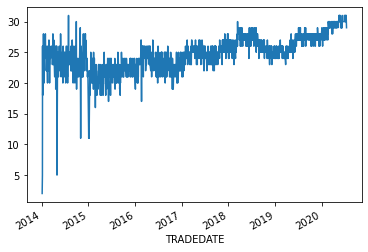

In [226]:
bonds_prices.notna().sum(axis = 1).plot()

In [227]:
sparse_days = bonds_prices[bonds_prices.notna().sum(axis = 1) < 10].index
sparse_days

DatetimeIndex(['2014-01-06', '2014-01-08', '2014-05-02'], dtype='datetime64[ns]', name='TRADEDATE', freq=None)

We could drop these three.

In [228]:
bonds_prices.drop(sparse_days, inplace = True)

## Sparse bonds removal

In [76]:
ISIN[15], ISIN[25], ISIN[28], ISIN[29], ISIN[38], ISIN[52]

('RU000A0JNHJ4',
 'RU000A0JRTL6',
 'RU0002868001',
 'RU000A0JS4M5',
 'RU0002867854',
 'RU0002867631')

In [229]:
bonds_prices[ISIN[15]][:523] = np.nan

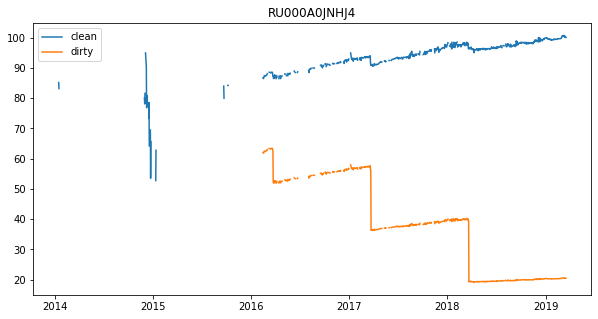

In [230]:
i = 15
plt.figure(figsize = (10, 5))
plt.title(ISIN[i])
plt.plot(bonds_clean_prices[ISIN[i]], label = 'clean')
plt.plot(bonds_prices[ISIN[i]], label = 'dirty')
plt.legend()

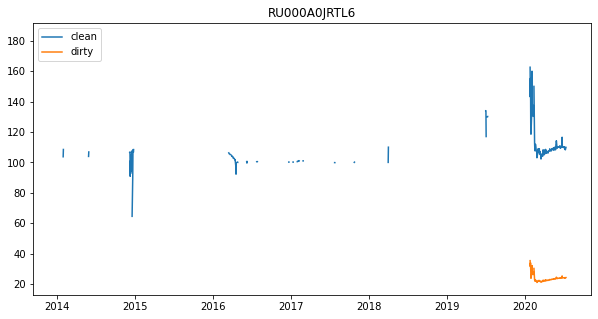

In [243]:
i = 25
plt.figure(figsize = (10, 5))
plt.title(ISIN[i])
plt.plot(bonds_clean_prices[ISIN[i]], label = 'clean')
plt.plot(bonds_prices[ISIN[i]], label = 'dirty')
plt.legend()

In [236]:
bonds_prices[ISIN[25]][:1519] = np.nan

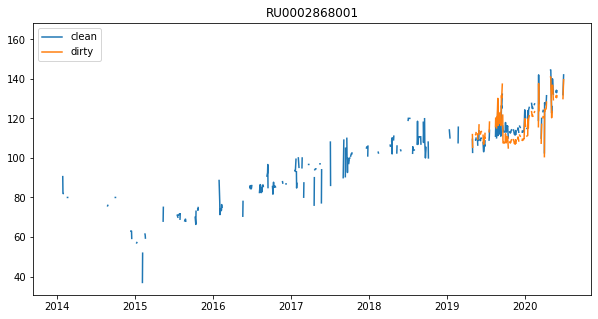

In [242]:
i = 28
plt.figure(figsize = (10, 5))
plt.title(ISIN[i])
plt.plot(bonds_clean_prices[ISIN[i]], label = 'clean')
plt.plot(bonds_prices[ISIN[i]], label = 'dirty')
plt.legend()

In [238]:
bonds_prices[ISIN[28]][:1334] = np.nan

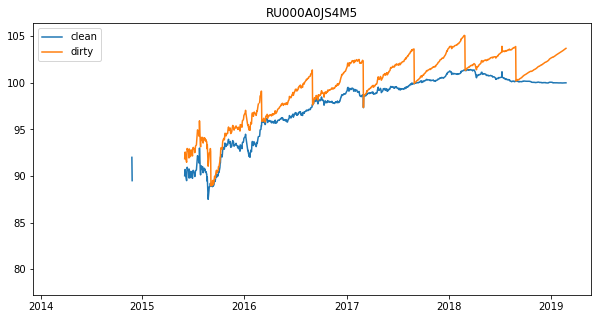

In [241]:
i = 29
plt.figure(figsize = (10, 5))
plt.title(ISIN[i])
plt.plot(bonds_clean_prices[ISIN[i]], label = 'clean')
plt.plot(bonds_prices[ISIN[i]], label = 'dirty')
plt.legend()

In [240]:
bonds_prices[ISIN[29]][:346] = np.nan

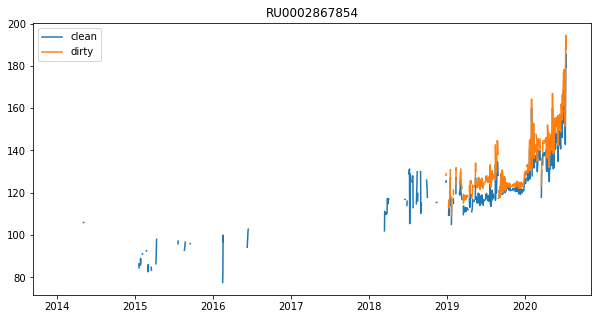

In [246]:
i = 38
plt.figure(figsize = (10, 5))
plt.title(ISIN[i])
plt.plot(bonds_clean_prices[ISIN[i]], label = 'clean')
plt.plot(bonds_prices[ISIN[i]], label = 'dirty')
plt.legend()

In [245]:
bonds_prices[ISIN[38]][:1250] = np.nan

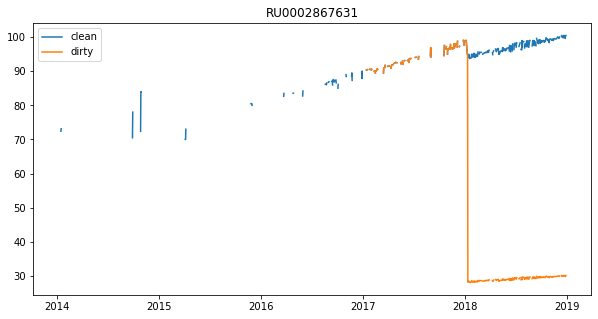

In [248]:
i = 52
plt.figure(figsize = (10, 5))
plt.title(ISIN[i])
plt.plot(bonds_clean_prices[ISIN[i]], label = 'clean')
plt.plot(bonds_prices[ISIN[i]], label = 'dirty')
plt.legend()

In [247]:
bonds_prices[ISIN[52]][:757] = np.nan

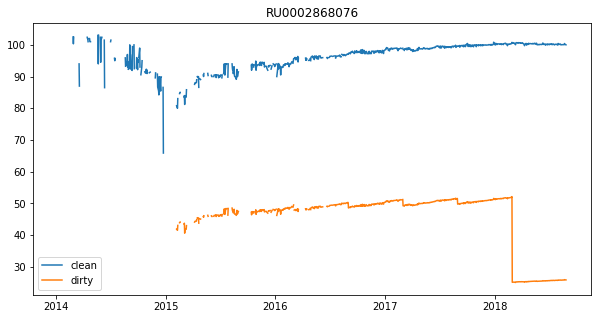

In [250]:
i = 51
plt.figure(figsize = (10, 5))
plt.title(ISIN[i])
plt.plot(bonds_clean_prices[ISIN[i]], label = 'clean')
plt.plot(bonds_prices[ISIN[i]], label = 'dirty')
plt.legend()

In [249]:
bonds_prices[ISIN[51]][:270] = np.nan

In [251]:
bonds_prices.shape

(1635, 53)

In [252]:
bonds_prices.to_csv('/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/Data/New_data/bonds_prices.csv')

# IRR calcultation

In [2]:
bonds_prices = pd.read_csv('/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/Data/New_data/bonds_prices_all.csv',
                           index_col='TRADEDATE', parse_dates=True)

In [3]:
bonds_payments = pd.read_csv('/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/Data/New_data/bonds_payments.csv',
                            index_col = 0)
bonds_payments['Дата фактической выплаты'] = pd.to_datetime(bonds_payments['Дата фактической выплаты'], format='%Y-%m-%d')

In [253]:
def npv(irr, cfs, yrs):  
    return np.sum(cfs / (1. + irr) ** yrs)

In [254]:
from scipy.optimize import fsolve

def irr(cfs, yrs, x0):
    return np.asscalar(fsolve(npv, x0=x0, args=(cfs, yrs)))

In [255]:
def maturities_irrs(date_number):
    irrs = []
    maturities = []
#    pdb.set_trace()
    payments_on_date = bonds_payments[bonds_payments['Дата фактической выплаты'] >= dates[date_number]]
    
    for ticker in ISIN:
    
        payments = payments_on_date[payments_on_date['ISIN'] == ticker]['Сумма купона, RUB'] + payments_on_date[payments_on_date['ISIN'] == ticker]['Погашение номинала, RUB'].values
        principal = payments_on_date[payments_on_date['ISIN'] == ticker]['Погашение номинала, RUB'].values.sum()
        payments_dates = (payments_on_date[payments_on_date['ISIN'] == ticker]['Дата фактической выплаты'] - dates[date_number]).apply(lambda x: x.days)/365
    
        investment = bonds_prices.iloc[date_number][ticker]
        payments = np.insert(np.array(payments), 0, -investment)
        payments_dates = np.insert(np.array(payments_dates), 0, 0)
        
        if np.isnan(payments[0]) == True:
            irrs.append(np.nan)
            maturities.append(np.nan)
        else:
            bond_irr = irr(cfs=payments, yrs=payments_dates, x0=0.10)
            irrs.append(bond_irr)
            maturities.append(payments_dates[-1])
            
        
    return (np.array([maturities]), np.array([irrs]))   

In [473]:
irr_matrix = pd.DataFrame(np.zeros(bonds_prices.shape), index = dates, columns = ISIN)
maturity_matrix = pd.DataFrame(np.zeros(bonds_prices.shape), index = dates, columns = ISIN)

In [474]:
%%time

for i in range(len(dates)):
    maturity_matrix[dates[i]:dates[i]], irr_matrix[dates[i]:dates[i]] = maturities_irrs(i)    

/Users/andrey_lukyanov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.


CPU times: user 5min 4s, sys: 576 ms, total: 5min 5s
Wall time: 5min 5s


In [475]:
%%bash
say finished

In [479]:
maturity_matrix.to_csv('/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/Data/New_data/bonds_maturities.csv')
irr_matrix.to_csv('/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/Data/New_data/bonds_irrs.csv')

In [483]:
maturity_matrix = pd.read_csv('/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/Data/New_data/bonds_maturities.csv', index_col='TRADEDATE', parse_dates=True)
irr_matrix = pd.read_csv('/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/Data/New_data/bonds_irrs.csv', index_col='TRADEDATE', parse_dates=True)

## BOOTSRAP

1. Сортируем бонды по их длине
2. Первую ставку взять из IRR наиболее короткого бонда
3. Далее решать каждый бонд при условии более коротких ставок.

In [485]:
from scipy.optimize import fsolve

In [486]:
def discount_by_rates(df, rates):
    df['Discounted'] = (df['Сумма купона, RUB'] + df['Погашение номинала, RUB']) * np.exp(-rates * df['Дата фактической выплаты'])

In [487]:
def generate_solve_for_rate(unknown, known, price):
    def solve_for_rate(rate):
        nonlocal unknown, known, price
        unknown['rates'] = np.ones(unknown.shape[0]) * rate
        discount_by_rates(unknown, unknown['rates'])
        return known + unknown.Discounted.sum() - price    
    
    return solve_for_rate

In [588]:
def bootsrap_rates_on_day(day_number):
    
    sorted_bonds = maturity_matrix.iloc[day_number].sort_values()
    sorted_bonds.dropna(inplace=True)
    
#    print(sorted_bonds)
#    print('Duplicated')
#    print(sorted_bonds[sorted_bonds.duplicated()])
    
#   check for bonds with similar maturity
    duplicated = sorted_bonds[sorted_bonds.duplicated()]
    
    if duplicated.empty == False:
        for i in range(duplicated.shape[0]):
            sorted_bonds[duplicated.index[i]] += 0.000001 * (i + 1)
                
#    print(sorted_bonds)
#    sorted_bonds.at[i_date] = i_coupon
    
    
    bootstraped_rates = {}
    bootstraped_rates[sorted_bonds.iloc[0]] = irr_matrix.iloc[day_number][sorted_bonds.index[0]]

    for i in range(1, sorted_bonds.shape[0]):
        
        payments_after_date = bonds_payments[(bonds_payments['ISIN'] == sorted_bonds.index[i]) & 
                                         (bonds_payments['Дата фактической выплаты'] > 
                                          dates[day_number])][['Сумма купона, RUB', 
                                                               'Погашение номинала, RUB', 
                                                               'Дата фактической выплаты']]

        calc_df = pd.concat([(payments_after_date['Дата фактической выплаты'] - dates[0]).apply(lambda x: x.days)/365, 
                         payments_after_date['Сумма купона, RUB'], payments_after_date['Погашение номинала, RUB']], 
                        axis = 1)
        calc_df['rates'] = np.zeros(calc_df.shape[0])
        
#        print(sorted_bonds.index[i])
        
#        print(bootstraped_rates)
#        print(i)

        
        known_rates_df = calc_df[calc_df['Дата фактической выплаты'] <= list(bootstraped_rates.keys())[i - 1]]       
        
        for j in range(len(bootstraped_rates)):
            
            #нужно заполнить столбец известными ставками
            mask = known_rates_df['Дата фактической выплаты'] < list(bootstraped_rates)[len(bootstraped_rates) - 1 - j]
            known_rates_df['rates'][mask] = bootstraped_rates[list(bootstraped_rates)[len(bootstraped_rates) - 1 - j]]
            #заполнили
        
        # дисконтируем известные платежи
        discount_by_rates(known_rates_df, known_rates_df['rates'])
        #считаем их сумму
#        print(known_rates_df)
        known = known_rates_df['Discounted'].sum()
#        print('Known:', known)
        
        
        #считываем цену
        price = bonds_prices.iloc[day_number][sorted_bonds.index[i]]
#        print('Price', price)
            
        unknown_rates_df = calc_df[calc_df['Дата фактической выплаты'] > list(bootstraped_rates.keys())[i - 1]]
#        print(unknown_rates_df)
        
        #генеририуем функцию для поиска неизвестной ставки 
        solve_for_rate_function = generate_solve_for_rate(unknown_rates_df, known, price)
        new_rate = fsolve(solve_for_rate_function, 0.1)[0]
#        print(new_rate)
        

        
        bootstraped_rates[sorted_bonds.iloc[i]] = new_rate

     
    return bootstraped_rates

In [601]:
%%time

all_bootstraped_rates = []

for i in range(len(dates)):
#    print('Day ' + str(i))
    all_bootstraped_rates.append(bootsrap_rates_on_day(i))

/Users/andrey_lukyanov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/andrey_lukyanov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/andrey_lukyanov/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterat

CPU times: user 18min 54s, sys: 5.99 s, total: 19min
Wall time: 19min 14s


In [602]:
for i in range(len(dates)):
    bt_rates_df = pd.DataFrame.from_dict(all_bootstraped_rates[i], orient='index', columns = ['rate'])
    bt_rates_df.reset_index(level = 0, inplace = True)
    bt_rates_df.columns = ['maturity', 'rates']
    bt_rates_df.to_csv('/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/Data/New_data/Raw_bootstraped_rates/bt_rates_' + str(dates[i].date()) + '.csv')

In [635]:
bootstraped_rates_list = []

for i in range(len(dates)):
    bootstraped_rates_list.append(pd.read_csv('/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/Data/New_data/bootstraped_rates/bt_rates_' + str(dates[i].date()) + '.csv', index_col=0))

In [634]:
for i in range(len(dates)):
    bootstraped_rates_list[i][bootstraped_rates_list[i].rates < 0.2].to_csv('/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/Data/New_data/Bootstraped_rates/bt_rates_' + str(dates[i].date()) + '.csv')

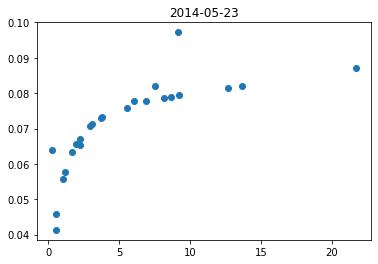

In [642]:
j = 95

plt.title(dates[j].date())
plt.scatter(bootstraped_rates_list[j].maturity, bootstraped_rates_list[j].rates);

## Diebold-Li weights generation

In [13]:
def ns(m, theta):
    tau = theta[0]
    beta0 = theta[1]
    beta1 = theta[2]
    beta2 = theta[3]
    return beta0 + beta1 * (1 - np.exp(- m / tau)) / (m / tau) + beta2 * ((1 - np.exp(- m / tau)) / (m / tau) - np.exp(- m / tau))

In [14]:
import statsmodels.api as sm

In [15]:
def get_loadings(m, tau):
    
    level = np.ones(m.shape[0])
    slope_hump = (1 - np.exp(- m / tau)) / (m / tau)
    hump =  - np.exp(- m / tau) 

    return level, slope_hump, hump

We set $\tau$ according to Diebold, Li 2006. The screnshot in the folder shows the way we obtained it.

In [16]:
def get_diebold_li_weights(day_number):

    df_shape = bootstraped_rates_list[day_number].shape[0]

    X = np.zeros([df_shape, 3])
    X[:,0], X[:,1], X[:,2] = get_loadings(m = bootstraped_rates_list[day_number].maturity.values, tau = 0.717313)
       
    y = bootstraped_rates_list[day_number].rates.values

    model = sm.OLS(y, X)
    beta = model.fit().params
    
    ns_theta = np.zeros(4)
    ns_theta[0] = 0.717313
    ns_theta[1] = beta[0]
    ns_theta[2] = beta[1] - beta[2]
    ns_theta[3] = beta[2]
    
    nss_theta = np.zeros(6)
    nss_theta[0] = 0.717313
    nss_theta[1] = ns_theta[0] + 1
    nss_theta[2] = beta[0]
    nss_theta[3] = beta[1] - beta[2]
    nss_theta[4] = beta[2]
    nss_theta[5] = (nss_theta[4] + 1)/100

    return ns_theta, nss_theta

In [675]:
%%time

diebold_li_weights = pd.DataFrame(np.zeros([bonds_prices.shape[0], 6]), index = dates,
                                  columns = ['tau1', 'tau2', 'beta0', 'beta1', 'beta2', 'beta3'])

for i in range(diebold_li_weights.shape[0]):
    diebold_li_weights.iloc[i] = get_diebold_li_weights(i)[1]
    
diebold_li_weights.to_csv('/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/Data/New_data/diebold_li.csv')

CPU times: user 813 ms, sys: 5.12 ms, total: 818 ms
Wall time: 821 ms


/Users/andrey_lukyanov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/thesis_library.py:31: RuntimeWarning: invalid value encountered in true_divide
  return beta0 + beta1 * (1 - np.exp(- m / tau1)) / (m / tau1) + beta2 * ((1 - np.exp(- m / tau1)) / (m / tau1) - np.exp(- m / tau1)) + beta3 * ((1 - np.exp(- m / tau2)) / (m / tau2) - np.exp(- m / tau2))


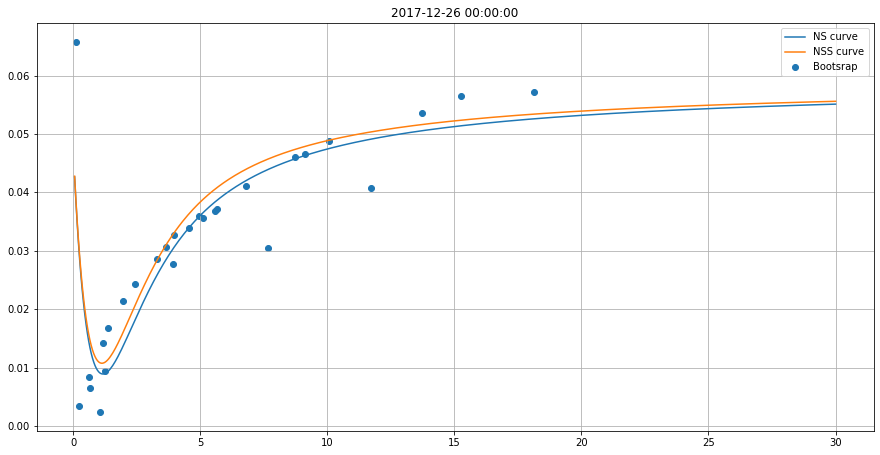

In [676]:
j = 1000

m = np.linspace(0, 30, 600)
plt.figure(figsize = (15,7.5))
plt.grid()
plt.plot(m, ns(m, get_diebold_li_weights(j)[0]), label = 'NS curve')
plt.plot(m, thesis_library.nss(m, get_diebold_li_weights(j)[1]), label = 'NSS curve')
plt.title(dates[j])
plt.scatter(bootstraped_rates_list[j].maturity, bootstraped_rates_list[j].rates, label = 'Bootsrap')
plt.legend();

### Calculating yields

In [719]:
yields = pd.DataFrame(np.zeros([bonds_prices.shape[0], 4]), index = dates,
                      columns = ['3-month', '2-year', '10-year', 'longest'])

for i in range(len(dates)):
    sorted_bonds = maturity_matrix.iloc[i].sort_values()
    sorted_bonds.dropna(inplace=True)
    
    month_3_bond = sorted_bonds.iloc[(sorted_bonds-1/4).abs().argsort()].index[0]
    year_2_bond = sorted_bonds.iloc[(sorted_bonds-2).abs().argsort()].index[0]
    year_10_bond = sorted_bonds.iloc[(sorted_bonds-10).abs().argsort()].index[0]
    longest_bond = sorted_bonds.index[-1]
    
    yields.at[dates[i], '3-month'] = irr_matrix[dates[i]:dates[i]][month_3_bond]
    yields.at[dates[i], '2-year'] = irr_matrix[dates[i]:dates[i]][year_2_bond]
    yields.at[dates[i], '10-year'] = irr_matrix[dates[i]:dates[i]][year_10_bond]
    yields.at[dates[i], 'longest'] = irr_matrix[dates[i]:dates[i]][longest_bond]              

In [721]:
yields.to_csv('/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/Data/New_data/yields.csv')

In [742]:
yields[dates[1]:dates[1]]

,3-month,2-year,10-year,longest
TRADEDATE,,,,
2014-01-08,0.059046,0.059046,0.074594,0.096524


In [761]:
i = 1

tau_1 = 30
tau_2 = 30
beta_0 = yields[dates[i]:dates[i]]['longest'][0]
beta_1 = yields[dates[i]:dates[i]]['10-year'][0] - yields[dates[i]:dates[i]]['3-month'][0]
beta_2 = 2 * yields[dates[i]:dates[i]]['2-year'][0] - yields[dates[i]:dates[i]]['3-month'][0] - yields[dates[i]:dates[i]]['10-year'][0]
beta_3 = beta_2

np.array([np.random.rand() * tau_1, np.random.rand() * tau_2, 3 * beta_0 * np.random.rand() - beta_0,
          3 * beta_1 * np.random.rand() - beta_1, 3 * beta_2 * np.random.rand() - beta_2, 
          3 * beta_3 * np.random.rand() - beta_3])

array([ 1.76745493e+01,  1.97433873e+01, -6.39291786e-02,  5.90868490e-03,
        1.50344858e-02,  1.16315710e-02])

In [868]:
yields[dates[100]:dates[100]]

,3-month,2-year,10-year,longest
TRADEDATE,,,,
2014-05-30,0.072912,0.079504,0.085895,0.093829


[ 2.85904732e+01  1.22720489e+01  9.32943961e-02 -9.68683742e-03
  8.04035835e-05 -3.19727717e-05]


/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/thesis_library.py:31: RuntimeWarning: invalid value encountered in true_divide
  return beta0 + beta1 * (1 - np.exp(- m / tau1)) / (m / tau1) + beta2 * ((1 - np.exp(- m / tau1)) / (m / tau1) - np.exp(- m / tau1)) + beta3 * ((1 - np.exp(- m / tau2)) / (m / tau2) - np.exp(- m / tau2))


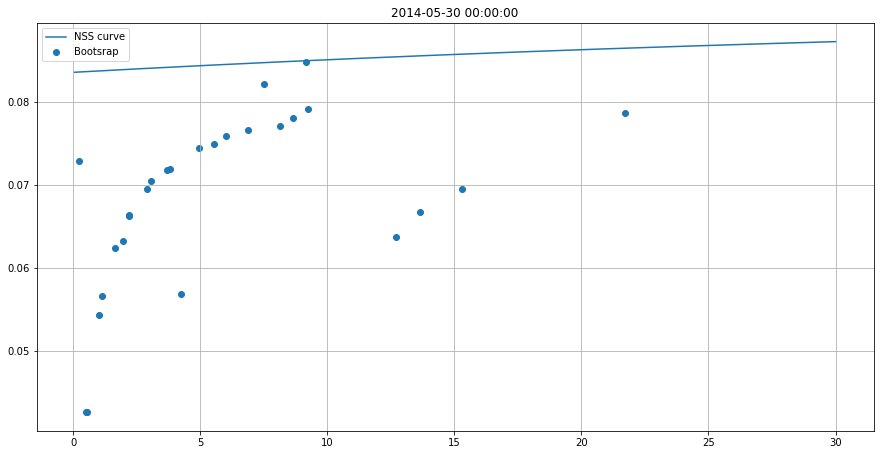

In [906]:
i = 100

tau_1 = 30
tau_2 = 30
beta_0 = yields[dates[i]:dates[i]]['longest'][0]
beta_1 = yields[dates[i]:dates[i]]['10-year'][0] - yields[dates[i]:dates[i]]['3-month'][0]
beta_2 = 2 * yields[dates[i]:dates[i]]['2-year'][0] - yields[dates[i]:dates[i]]['3-month'][0] - yields[dates[i]:dates[i]]['10-year'][0]
beta_3 = beta_2

theta = np.array([np.random.rand() * tau_1, np.random.rand() * tau_2, 3 * beta_0 * np.random.rand() - beta_0,
          3 * beta_1 * np.random.rand() - beta_1, 3 * beta_2 * np.random.rand() - beta_2, 
          3 * beta_3 * np.random.rand() - beta_3])

m = np.linspace(0, 30, 600)
plt.figure(figsize = (15,7.5))
plt.title(dates[i])
plt.grid()
plt.plot(m, thesis_library.nss(m, theta), label = 'NSS curve')
plt.scatter(bootstraped_rates_list[i].maturity, bootstraped_rates_list[i].rates, label = 'Bootsrap')
plt.legend()
print(theta);